# ERROS E PROBLEMAS NA MODELAGEM DE INFECÇÕES

### Autor: Yuri Passuelo

### Data: Julho de 2020

## Introdução

Esse se trata apenas de um resumo de alguns erros e problemas que podem ser encontrados na tentativa de modelar/prever a quantidade de casos de uma deterinada epidemia, nesse breve resumo utilizamos infor informações divulgadas por parte da universidade Jonh Hopkins acerca das estatísticas de transmissão do coronavírus com foco no Brasil, não se trata de um trabalho de cunho profissional e sim apenas de pura forma de divulgar algumas informações, buscamos durante o relatório aplicar diferentes metodologias para a estimação do comportamento de como crescem as infecções no Brasil, ao fim do texto divulgaremos os problemas associados a modelagem simples sem a teoria da infectologia e as as respectivas fontes relacionadas a infecção.

## Analise Primaria dos Dados

Abaixo seguem os dados atualizados para as datas mais recentes (27 de julho de 2020), nesses gráficos estamos colocando a evolução dos casos de COVID registrados no Brasil até a data mais recente de forma acumulada, e no gráfico seguinte o número de novos casos diários registrados. Não necessariamente o número de casos deve ser o mesmo com os reportados pelo ministério da saúde, uma vez que a fonte de dados da Jonh Hopkins Univeristy irá considerar dados provenientes das secretarias de saúde dos estados também.

é de se notar que até a data atual (27 de julho de 2020) exatatamente 152 dias depois do primeiro caso confirmado, a curva ainda se apresenta na etapa de ascenção, é lógico que existem particularidades regionais, aonde devido a proximidade e a circulação de pessoas pode ocorrer uma migração de focos entre as regiões, e também existe o impacto de medidas de isolamento social ou reabertura que podem impactar esses números.

Quanto aos novos casos diarios existe a clara percepção de uma aparente sazonalidade, essa se apresenta de forma que durante a semana ocorrem picos de casos (até a sexta feira) e nos finais de semana os casos caiam, esse efeito pode nos permitir imaginar uma série de situações, como durante a semana ocorre o maior fluxo de pessoas que viaja de casa ao trabalho e portanto tem maio frequência do transporte público existe a possibilidade de uma maior propenção a contaminassão e registro nesses dias, ou também devido so fato da busca por assistência média só se realizar durante a semana, portanto acumulando alguns casos de infecção que poderiam/deveriam ter acontecido durante o final de semana.


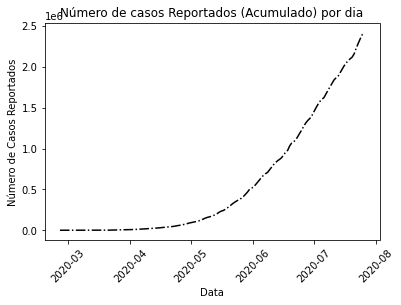

Text(0.5, 1.0, 'Número de novos casos Reportados por dia')

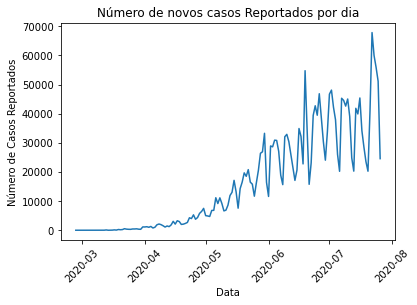

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim
import random
import datetime as dt
from sklearn.linear_model import LinearRegression

warnings.simplefilter('ignore')

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_data = pd.read_csv(url,error_bad_lines=False). \
                melt( id_vars = ['Country/Region', 'Province/State', 'Lat', 'Long'],
                      value_name = 'Cases',
                      var_name   = 'Date' ). \
                rename( columns = {'Country/Region':'Country',
                                   'Province/State':'State'})

br_covid = covid_data[ covid_data['Country'] == 'Brazil'].reset_index(). \
           query(" Cases >= 1"). \
           assign(Dys_1st_case = lambda x: [ i for i in range(0,len(x))]). \
           reset_index()

# Número de casos acumulados por dia

plt.plot(pd.Series(np.array(br_covid['Cases']),
                   index=pd.date_range(br_covid['Date'].iloc[0],periods=len(br_covid['Date']))),
                   label='Casos Efetivos',
                   c='black',
                   linestyle='-.')
plt.ylabel('Número de Casos Reportados')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.title("Número de casos Reportados (Acumulado) por dia",loc='center')
plt.show()

# Novos casos por dia

new_cases_br = pd.DataFrame( {'Date': br_covid.loc[1:len(br_covid),'Date'] ,
                              'novos_casos':[ br_covid.loc[i-1,'Cases'] if i == 0 else br_covid.loc[i,'Cases'] - br_covid.loc[i-1,'Cases'] 
                                              for i in range(1,len(br_covid))]} )

# Gráfico da evolução dos novos casos diarios

plt.plot( pd.Series( np.array( pd.to_datetime( new_cases_br['Date'] ) ) ),
          np.array( new_cases_br['novos_casos'] ) )
plt.ylabel('Número de Casos Reportados')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.title("Número de novos casos Reportados por dia",loc='center')

Abaixo mostramos a comparação dos paises que foram ou são foco da pandemia, os paises listados são em ordem:
- Brasil;
- Coreia do Sul;
- Espanha;
- Estados Unidos; e
- Italia.

A escolha deles se deu pois, não são origem do foco da pandemia (China) mas foram paises que tiveram ou tem grande exposição midiatica pela gravidade com que a pandemia afetou os paises, se pegarmos em um ordem cronologica os paises que foram focos foram: A coreia do sul, a italia, espanha, os Estados Unidos e agora o Brasil, outros paises como a grâ bretanha e a Russia também foram focos, porém não tiveram o tamanho da proporção que esses vivenciaram.

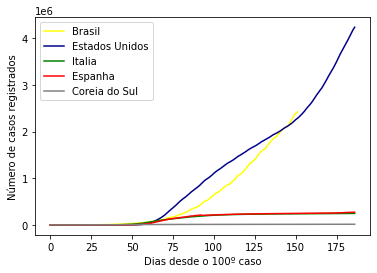

In [24]:

def base_pais(nome_pais):
    
    return covid_data[ covid_data['Country'] == nome_pais]

us_covid, it_covid, sp_covid, sk_covid = base_pais("US"), base_pais("Italy"), base_pais("Spain"), base_pais("Korea, South")

    
plt.plot(np.array(br_covid['Cases']),
        c='yellow',
        label='Brasil')
plt.plot(np.array(us_covid['Cases']),
        c='darkblue',
        label='Estados Unidos')
plt.plot(np.array(it_covid['Cases']),
        c='green',
        label='Italia')
plt.plot(np.array(sp_covid['Cases']),
        c='red',
        label='Espanha')
plt.plot(np.array(sk_covid['Cases']),
        c='grey',
        label='Coreia do Sul')
plt.legend()
plt.xlabel('Dias desde o 100º caso')
plt.ylabel('Número de casos registrados')
plt.show()

O que vemos é que todos os países sofreram um amento considerável de casos a partir da notificação do 100º, com base nas informações disponíveis divulgadas nos principais veículos de comunicação, essa aceleração que deixou todos os outros países com mais de 5000 casos se deve ao fato do início da transmissão interna do vírus, que acaba tomando maior velocidade.

O Brasil apresenta inicialmente menos casos, principalmente devido ao fato de ter a semana epidemilogica mais "atrasada" do que o restante dessa amostra, porém pelo menos na database de julho de 2020 vemos que relativamente a os outros paises inclusive aos estados unidos, o Brasil já apresenta mais casos do que o restante da amostra, muitos fatores explicam o fato do Brasil estar atrasado na semana semana depdemiológica e ter tido inicialmente, pelo menos de forma aparente, um maior nivel de controle sobre o total de casos:

1. O fato de o Brasil ser um país mais isolado das redes de turismo e comercio global afeta consideravelmente o fluxo de pessoas estrangeiras que passam no país e, portanto, reduzindo o risco de uma expansão no número de infecções.
2. A tomada de medidas precoces contra a expansão da contaminação do vírus pode ter surtido efeito de forma antecipada ao controlar o número de infecções.
3. A falta de disponibilidade de testes para contabilizar de forma mais assertiva o número de casos pode estar gerando uma subestimação do número de casos registrados no País.
4. O Simples fato de estarmos lidando com uma amostra de países que não representaria ao certo as mesmas características e condições do Brasil.

A partir apenas de informações que mostram a evolução dos casos de COVID no pais não poderíamos tirar muitas conclusões, para isso analises mais apuradas e robustas devem se utilizar de mais fontes de informação, e que sejam mais ricas em detalhes, como os micro dados do DataSUS que podem nos mostrar os registro de internação no período, o que poderia nos indicar por exemplo, de uma aumento no número de internações sem diagnostico.


## Modelos Para analise do comportamento de infeção

Como explicado no inicio, vamos tentar mostrar alguns erros e problemas que podem ser enfrentados na tentativa de modelar o número de casos, abaixo temos os modelo que tentaremos usar para modelar os casos, depois de cada tentativa descreveremos os problemas envolvidos com os resultados.

1. Regressão Exponencial: Basicamente a estimação de uma regressão linear normal, estimada por mínimos quadrados ordinários, porém com o parâmetro y no formato de logaritmo.
2. Modelo de Crescimento Logístico (LGM): diferente da regressão exponencial não possui estimação por mínimos quadrados, porém é muito mais adequado na modelagem de crescimento de populações

### Modelo de Regressão Exponencial

Como já dito o modelo de regressão exponencial utilizaria basicamente o mesmo conceito de uma regressão linear comum, porém com parâmetro y em log, a transformação que leva a essa estimação se baseia nas seguintes transformações:

\begin{align}
y = \alpha e^\beta t
\end{align}

Aonde y é o número de casos de corona confirmados acumulados, alpha e beta são parâmetros a serem estimados e t é a variável endógena do tempo.

Aplicando o logaritmo neperiano dos dois lados teremos:

\begin{align}
ln(y) = ln(\alpha e^{\beta t})
\end{align}

\begin{align}
ln(y) = ln(\alpha) + ln(e^{\beta t})
\end{align}

\begin{align}
ln(y) = ln(\alpha) + \beta t
\end{align}

Nessa forma funcional podemos estimar uma regressão linear para o logaritmo do número de casos estimados em função do tempo, dada a estimação do modelo e o cálculo do log do número estimado de casos de COVID podemos estimar o número real apenas aplicando:

\begin{align}
\dot{y} = e^{ln(\alpha) + \beta t}
\end{align}

Nos gráficos abaixo teremos a comparação do número de casos confirmados até hoje, e o número de casos confirmados estimado pelo modelo de regressão exponencial, depois mostramos o "fit" do modelo aonde temos um "scatterplot" que coloca no eixo das ordenadas o logaritmo do número de casos estimados, e no eixo das abcissas o número de dias desde o primeiro caso confirmado.

É possível notar que não existe um bom fit no modelo, se utilizando apenas do primeiro mês de infecção, que nos mostra a fase de maior aceleração da curva de casos vemos que realmente talvez existe um bom fit, mas depois com o andamento das semanas esse desempenho cai, isso porque nas primeiras semanas de contagio o número de casos cresce de forma exponencial mas logo depois começa a ter uma desaceleração, mostrando assim que os casos começam a ter outra função de crescimento, esse descolamento do número de casos estimados pelo modelo e de casos efetivos pode ser visualizando nos dois gráficos.
1. No primeiro gráfico temos que há uma desaceleração total dos casos registrados, enquanto o modelo exponencial estima altas taxas de crescimento, os casos efetivos parecem ficar bem abaixo do estimado pelo modelo.
2. No fit do modelo vemos que em dias mais recentes os pontos no gráfico ficam abaixo da linha estimada pela regressão, indicando desaceleração do número dos casos comparado ao modelo.

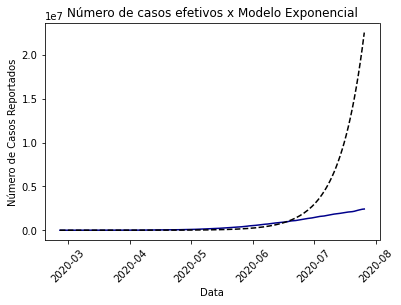

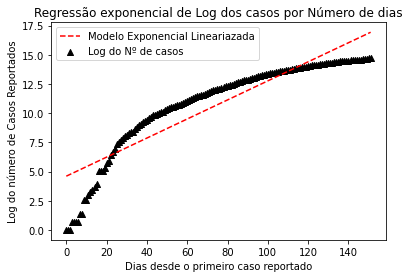

In [31]:

# Primeira tentativa de modelo é a de se fazer uma regressão linear simples com parametro de casos por dia convertido para 
# o logaritmo neperiano do númeri dos casos, isso nos permite adotar a forma funcional de y = a*e^b*x, ou seja, estamos adotando
# a premissa que a epidemia segue uma tendência exponencial. Aplicando o logaritmo neperianos nos dois lados da equação teremos:
# ln(y) = ln(a) + b*x

#cria array de variaveis (Dias desde o primeiro caso)

br_covid['Ln_Cases'] = np.log( br_covid['Cases'])


model_1 = LinearRegression(fit_intercept=True).fit(br_covid['Dys_1st_case'].values.reshape(-1, 1),
                                                     br_covid['Ln_Cases'].values.reshape(-1, 1))


predict_ln_cases = model_1.predict(br_covid['Dys_1st_case'].values.reshape(-1, 1))

br_covid['Predicted_Ln_Cases'] = predict_ln_cases
br_covid['Predicted_Cases'] = np.exp(predict_ln_cases)

#Casos efetivos vs Modelo Exponencial


plt.plot(pd.Series(np.array(br_covid['Cases']),
                   index=pd.date_range(br_covid['Date'].iloc[0],periods=len(br_covid['Date']))),
                   label='Casos Efetivos',
                   c='darkblue')
plt.plot(pd.Series(np.array(br_covid['Predicted_Cases']),
                   index=pd.date_range(br_covid['Date'].iloc[0],periods=len(br_covid['Date']))),
                   label='Modelo Exponencial',
                   linestyle='--',
                   c='black')
plt.ylabel('Número de Casos Reportados')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.title("Número de casos efetivos x Modelo Exponencial",loc='center')
plt.show()

# Plot da regressão Exponencial

plt.scatter(x=np.array(br_covid['Dys_1st_case']), 
            y= np.array(br_covid['Ln_Cases']),
            c='black',
            marker='^',
           label='Log do Nº de casos')    
plt.plot(np.array(br_covid['Dys_1st_case']),
         np.array(br_covid['Predicted_Ln_Cases']),
         c= "red", 
         linestyle='--',
         label='Modelo Exponencial Lineariazada')
plt.legend()
plt.ylabel('Log do número de Casos Reportados')
plt.xlabel('Dias desde o primeiro caso reportado')
plt.title("Regressão exponencial de Log dos casos por Número de dias",loc='center')
plt.show()

### Modelo de Crescimento Logistico (LGM)

Diferente da regressão exponencial o modelo de crescimento logístico não é um modelo que consegue sofrer alterações na sua forma funcional para ser estimado por meio de mínimos quadrados ordinários e portanto lida com outras técnicas de otimização, esse modelo se mostra mais apropriado para estimação do crescimento de populações, uma vez que tem um formato signoidal (formato de S) e portanto apresenta um ponto em que a curva se estabiliza, mostrando limites para o crescimento dessa população, diferentemente de uma regressão exponencial. O modelo de crescimento logístico pode ser representado pela seguinte formula.

\begin{align}
f(t) = \frac{\gamma}{\alpha + e^{\beta t}}
\end{align}

o número de casos representado por f(t) é uma função que dependente do tempo, aonde gamma é o nivel máximo de casos que a infecção pode levar, \beta é o parametro de aceleração da curva logística e alpha será o indicador do nivel de transição

Para estimação da curva logistica utilizamos o metodo de maximoverossimilhança, estimando os parametros gamma, alpha e beta que minimizam os residuos entre os valores estimados e os reais do número de casos em função de tempo.

Nos gráficos abaixo podemos comparar a evolução dos casos registrados de forma efetiva, e o estimado pelo modelo logístico, e também a previsão do número máximo de casos que o modelo logístico estima para 90 dias a partir do primeiro caso registrado no Brasil, temos que as curvas ficam de forma próxima, porém com o valores estimados pelo modelo logístico em um grau abaixo do efetivo.

Analisando o comportamento das estimativas temos que até dado momento, tivemos a estimativa do parâmetro Gama para um número em torno dos 5000 casos, número bem baixo se comparado a evolução em outros países, é lógico que não se trata de uma estimativa totalmente apurada, outros parâmetros poderiam ser adicionados para enriquecer a estimativa, mas podemos ter uma noção da diferença entre as estimativas por meio da regressão exponencial e do modelo de crescimento logístico.


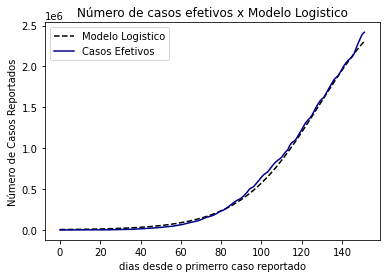

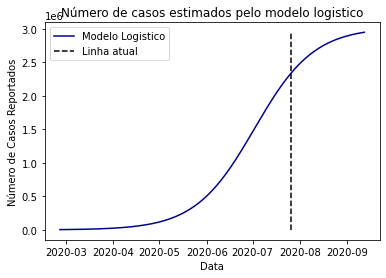

In [67]:

### Aplicando um modelo de crescimento logistico ###

# Modelo logistico

def logistic_func(t,a,b,c):
    
    return c/(1+a*np.exp(-b*t))

def logistic_func2(t):
    
    return c/(1+a*np.exp(-b*t))


intervalos = (0, [100000.,3000000.,200000000])
random.seed(a = 13113)
par = [random.random(),random.random(),random.random()]

### Usando outros modelos para estimação dos casos ###

(a,b,c),cov = optim.curve_fit(logistic_func,
                              np.array(br_covid['Dys_1st_case'])+1,
                              np.array(br_covid['Cases']),
                              bounds=intervalos,
                              p0=par)

# Plot Casos efetivos x Modelo Logistico

predict_logistic = [ logistic_func2(t) for t in np.array(br_covid['Dys_1st_case'])]

plt.plot(np.array(br_covid['Dys_1st_case']),predict_logistic,linestyle='--',c='black',label='Modelo Logistico')
plt.plot(np.array(br_covid['Dys_1st_case']),np.array(br_covid['Cases']),c='darkblue',label='Casos Efetivos')
plt.legend()
plt.ylabel('Número de Casos Reportados')
plt.xlabel('dias desde o primerro caso reportado')
plt.title("Número de casos efetivos x Modelo Logistico",loc='center')
plt.show()

# Simulando o comportamento da curva durante o periodo de 200 dias após a infeção #

simul_logistic = [logistic_func2(t) for t in range(1,201)]


plt.plot(pd.Series(simul_logistic, 
                   index=pd.date_range(br_covid['Date'].iloc[0],periods=200)),
         c='darkblue',
         label='Modelo Logistico')
plt.vlines(x=max(pd.date_range(start='26/02/2020',periods=len(br_covid))) , 
           ymin=1 , 
           ymax=max(simul_logistic) , 
           linestyle= '--', 
           label = 'Linha atual')
plt.legend()
plt.ylabel('Número de Casos Reportados')
plt.xlabel('Data')
plt.title("Número de casos estimados pelo modelo logistico",loc='center')
plt.show()

Apesar de a função logística apresentar uma caracteristica mais apropriada para a predição de casos, existe a necessidade da utilização do conceitual teórico de epdemiologia, portanto a utilização de um modelo que busca prever a quantidade de casos puramente em função do tempo não seria algo muito util.

Assim, se pegarmos essa versão mais simples de modelagem incorremos em um problema a respeito de modelos não lineares, pelas próprias caracteristicas de infecção, principalmente de casos novos que apresentam uma caracteristica de sazonalidade, tendo mais casos durante a semana e menos durante o final de semana, nosso modelo será muito instavel, pelas mudanças na aceleração da curva que serão sentidas no decorrer dessa sazonalidade, os parametros do modelo logistico terão uma variação.

O gráfico abaixo ilustra esse cenario, aonde mostramos os resultados dos valores preditos por diversos modelos utilizando diferentes periodos com novas informações apartir do sexágesimo oitavo dia.

<function matplotlib.pyplot.show(*args, **kw)>

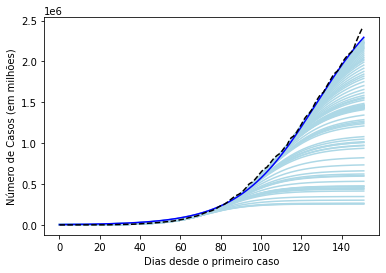

In [69]:
def calc_par(t):
    
    try:
        random.seed(a = 13113)
   
        par = [random.random(),random.random(),random.random()]

        (a,b,c),cov = optim.curve_fit(logistic_func,
                                  np.array(br_covid.loc[br_covid.index[0:t],'Dys_1st_case'])+1,
                                  np.array(br_covid.loc[br_covid.index[0:t],'Cases']),
                                  bounds=intervalos,
                                  p0=par,
                                  maxfev=10000)
                
        return [a,b,c,t]
    
    except RuntimeError:
        
        return calc_par(t)
    
parametros = [ calc_par(i) for i in range(68,len(br_covid))]   

# calculando resultados

def logistic_growth(t,a,b,c):
    
    return c/(1+a*np.exp(-b*t))

resultados = [[logistic_growth(t,i[0],i[1],i[2]) for t in range(0,len(br_covid))]  for i in parametros ]  
    
# desenhando os gráficos
    
for i in range(0,len(resultados)-1):
    
    plt.plot([t for t in range(0,len(br_covid))],resultados[i],c='lightblue',label='predicts')

plt.plot([t for t in range(0,len(br_covid))],resultados[len(resultados)-1],c='blue',label='predicts')
plt.plot(np.array(br_covid['Dys_1st_case']),np.array(br_covid['Cases']),linestyle='--',c='black',label='Estimados pelo Modelo')
plt.xlabel('Dias desde o primeiro caso')
plt.ylabel('Número de Casos (em milhões)')
plt.show
    


## Conclusão

Nesse relatório simples buscamos apenas mostrar informações disponíveis de forma pública e aplicar algumas técnicas de modelagem de forma bem breve e sem adentrar nos detalhes e muito menos nas estatísticas de inferência/performance, buscando apenas dar uma visão diferente.

Fonte dos dados: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Link GitHub: https://github.com/yuripassuelo/Python